In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Percobaan 1

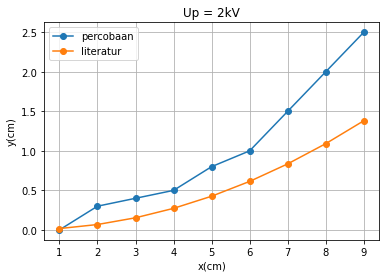

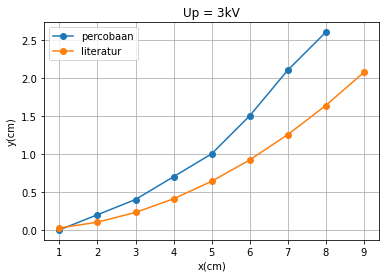

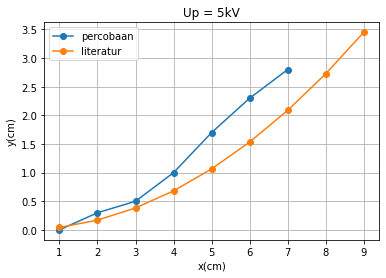

   x(cm)  y(cm)(Up = 2kV)  y(cm)(Up = 3kV)  y(cm)(Up = 5kV)  \
0      1              0.0              0.0              0.0   
1      2              0.3              0.2              0.3   
2      3              0.4              0.4              0.5   
3      4              0.5              0.7              1.0   
4      5              0.8              1.0              1.7   
5      6              1.0              1.5              2.3   
6      7              1.5              2.1              2.8   
7      8              2.0              2.6              NaN   
8      9              2.5              NaN              NaN   

   ylit(cm)(Up = 2kV)  ylit(cm)(Up = 3kV)  ylit(cm)(Up = 5kV)  
0            0.017045            0.025568            0.042614  
1            0.068182            0.102273            0.170455  
2            0.153409            0.230114            0.383523  
3            0.272727            0.409091            0.681818  
4            0.426136            0.639205        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

df_1 = pd.read_csv('percobaan 1.txt','\t')

Up = [2, 3, 5]
Ua = 4
d = 5.5 
def calc_ylit(x, Up, Ua, d):
    return (0.75*Up*(x**2))/(4*Ua*d)

for iup in range(len(Up)):
    df_1[f'ylit(cm)(Up = {Up[iup]}kV)']=df_1.apply(
        lambda row : calc_ylit(row['x(cm)'], Up[iup], Ua, d), axis = 1)
    
    plt.plot('x(cm)', f'y(cm)(Up = {Up[iup]}kV)', data=df_1, label = 'percobaan', marker = 'o')
    plt.plot('x(cm)', f'ylit(cm)(Up = {Up[iup]}kV)', data=df_1, label = 'literatur', marker = 'o')
    plt.grid()
    plt.xlabel('x(cm)')
    plt.ylabel('y(cm)')
    plt.title(f'Up = {Up[iup]}kV')
    plt.legend()
    plt.show()
    
print(df_1)

# Percobaan 2

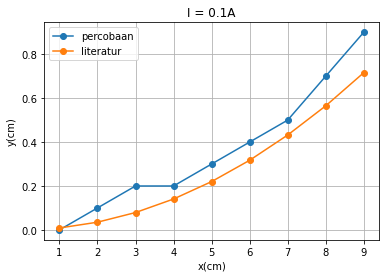

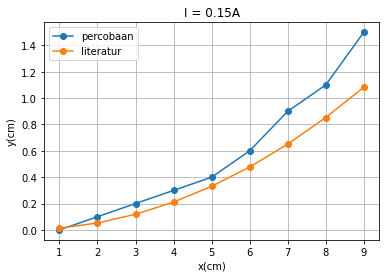

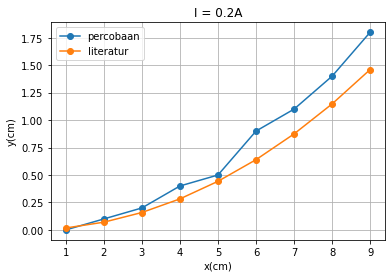

   x(cm)  y(cm)(I = 0.1A)  y(cm)(I = 0.15A)  y(cm)(I = 0.2A)  \
0      1              0.0               0.0              0.0   
1      2              0.1               0.1              0.1   
2      3              0.2               0.2              0.2   
3      4              0.2               0.3              0.4   
4      5              0.3               0.4              0.5   
5      6              0.4               0.6              0.9   
6      7              0.5               0.9              1.1   
7      8              0.7               1.1              1.4   
8      9              0.9               1.5              1.8   

   ylit(cm)(I = 0.1A)  e/m eksperimen(I = 0.1A)  \
0            0.008784              1.758819e+11   
1            0.035145              1.758819e+11   
2            0.079107              1.758819e+11   
3            0.140710              1.758819e+11   
4            0.220014              1.758819e+11   
5            0.317090              1.758819e+11   
6 

In [4]:
df_2 = pd.read_csv('percobaan 2.txt','\t')

I = [0.1, 0.15, 0.2]
R = 0.12
Ua = 4000
d = 5.5
N = 500
e = 1.602176 * 10**-19
m = 9.109383 * 10**-31
vac_perm = 4*math.pi*(10**-7)

def calc_ylit(x, r):
    return r*100 - math.sqrt((r*100)**2 - x**2)

def lit_err(lit, exp):
    return abs((lit-exp)/lit)*100
    
emr_lit = 1.758820 * 10**11

for iI in range(len(I)):
    B = vac_perm*((4/5)**(3/2))*(N*I[iI])/R
    r = math.sqrt((2*m*Ua)/(e*(B**2))) 
    emr_exp = (2*Ua)/(B*r)**2
    
    df_2[f'ylit(cm)(I = {I[iI]}A)']=df_2.apply(lambda row : calc_ylit(row['x(cm)'], r), axis = 1)
    df_2[f'e/m eksperimen(I = {I[iI]}A)']=emr_exp
    df_2[f'Kesalahan literatur e/m(I = {I[iI]}A)']=df_2.apply(lambda row : lit_err(emr_lit, emr_exp), axis = 1)
    
    plt.plot('x(cm)', f'y(cm)(I = {I[iI]}A)', data=df_2, label = 'percobaan', marker = 'o')
    plt.plot('x(cm)', f'ylit(cm)(I = {I[iI]}A)', data=df_2, label = 'literatur', marker = 'o')
    plt.grid()
    plt.xlabel('x(cm)')
    plt.ylabel('y(cm)')
    plt.title(f'I = {I[iI]}A')
    plt.legend()
    plt.show()
    
print(df_2)

# Percobaan 3

In [3]:
df_3 = pd.read_csv('percobaan 3.txt','\t')

d = 5.5/100
R = 0.12
N = 500
Ua = 4
vac_perm = 4*math.pi*(10**-7)

def elec_field(Up):
    return 0.75*Up/d

def mag_field(I):
    return vac_perm*((4/5)**(3/2))*(N*I)/R

def emr(Ua, Up, I):
    E = elec_field(Up)
    B = mag_field(I)
    return (1/(2*Ua))*(E/B)**2

df_3['E(kV/m)']=df_3.apply(lambda row : elec_field(row['Up(kV)']), axis = 1)
df_3['B(mT)']=df_3.apply(lambda row : mag_field(row['I(A)']*1000), axis = 1)
df_3['e/m eksperimen']=df_3.apply(lambda row : emr((row['Ua(kV)']*1000), row['Up(kV)'], row['I(A)']), axis = 1)

# Kesalahan Literatur
def lit_error(lit, exp):
    return abs((lit-exp)/lit)*100
    
emr_lit = 1.758820 * 10**11
df_3['Kesalahan literatur e/m']=df_3.apply(lambda row : lit_error(emr_lit, row['e/m eksperimen']), axis = 1)
                                          
print(df_3)

   Ua(kV)  Up(kV)  I(A)    E(kV/m)     B(mT)  e/m eksperimen  \
0     3.0       4  0.78  54.545455  2.922323    58064.336682   
1     4.0       4  0.80  54.545455  2.997254    41398.057544   
2     4.9       4  0.77  54.545455  2.884857    36478.955845   

   Kesalahan literatur e/m  
0                99.999967  
1                99.999976  
2                99.999979  


# Export ke Excel

In [68]:
writer = pd.ExcelWriter('Pengolahan Data EM3 Thomson Tube.xlsx', engine='xlsxwriter')

# Tulis setiap dataframe menjadi worksheet berbeda
df_1.to_excel(writer, sheet_name='Defleksi Medan Listrik')
df_2.to_excel(writer, sheet_name='Defleksi Medan Magnet')
df_3.to_excel(writer, sheet_name='Filter Wien')

# Tutup writer Excel dari pandas dan simpan file excelnya
writer.save()